In [2]:
import torch
from torch import nn
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.constants import G
import pickle

c:\Users\Anurag Kadam\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# Constants

kpc = 3.08567758128e19
km = 1e3
km_sq = 1e6

m0 = 1.9885e30  # mass of sun
h = 0.671
rho_crit = 143.84 * m0 / (kpc**3)
multip_constant = h / (10**12 * m0)


In [4]:
SPARC_columns = ["ID", "R", "Vobs", "e_Vobs", "Vgas", "Vdisk", "Vbul"]
SPARC = pd.read_csv("SPARC_formatted.csv")

In [5]:
# galaxy grps


All_gals = list(set(SPARC["ID"]))


# grp A


A_grp = [
    "F568-V1",
    "NGC0024",
    "NGC2683",
    "NGC2915",
    "NGC3198",
    "NGC3521",
    "NGC3769",
    "NGC3893",
    "NGC3949",
    "NGC3953",

]


A_m200 = np.array([5.43, 2.75, 4.38, 1.31, 4.65, 17.65, 2.66, 12.05, 18.98, 3.69]) * (
    m0 * 10**11
)


A_gam_D = np.array([0.63, 0.79, 0.68, 0.32, 0.52, 0.51, 0.36, 0.49, 0.37, 0.65])


A_gam_B = np.array([0.52])


# grp B

B_grp = [
    "NGC3992",
    "NGC4051",
    "NGC4088",
    "NGC4100",
    "NGC4138",
    "NGC4157",
    "NGC4183",
    "NGC4559",
    "NGC5005",
    "NGC6503",
]


B_m200 = np.array([15.28, 2.72, 4.62, 5.18, 4.04, 8.21, 1.43, 2.33, 84.90, 2.36]) * (
    m0 * 10**11
)

B_gam_D = np.array([0.77, 0.43, 0.31, 0.72, 0.71, 0.38, 0.67, 0.33, 0.44, 0.53])

B_gam_B = np.array([0.53, 0.46, 0.51])


# grp C

C_grp = [
    "UGC06983",
    "UGC07261",
    "UGC07690",
    "UGC07866",
    "UGC08490",
    "UGC08550",
    "UGC08699",
    "UGC09992",
    "UGC10310",
    "UGC12506",
]

C_m200 = np.array([2.16, 0.64, 0.21, 0.03, 0.87, 0.27, 8.22, 0.03, 0.43, 19.76]) * (
    m0 * 10**11
)

C_gam_D = np.array([0.65, 0.57, 0.70, 0.43, 0.79, 0.63, 0.77, 0.47, 0.54, 0.79])

C_gam_B = np.array([0.67])


# grp D


D_grp = [
    "NGC7331",
    "NGC7793",
    "NGC7814",
    "UGC02259",
    "UGC03546",
    "UGC06446",
    "UGC06930",
    "UGC06983",
    "UGC07261",
    "UGC07690",
]


D_m200 = np.array([20.56,1.01,21.39,0.75,9.33,0.56,1.19,1.65,0.34,0.10]) * (
    m0 * 10**11
)

D_gam_D = np.array([0.32,0.41,0.76,0.72,0.55,0.50,0.40,0.40,0.49,0.66])

D_gam_B = np.array([0.49, 0.60, 0.38])



In [6]:
# galaxies to be optimized for

grp_selection_dict = {
    "A_grp": A_grp,
    "A_m200": A_m200,
    "A_gam_D": A_gam_D,
    "A_gam_B": A_gam_B,
    "B_grp": B_grp,
    "B_m200": B_m200,
    "B_gam_D": B_gam_D,
    "B_gam_B": B_gam_B,
    "C_grp": C_grp,
    "C_m200": C_m200,
    "C_gam_D": C_gam_D,
    "C_gam_B": C_gam_B,
    "D_grp": D_grp,
    "D_m200": D_m200,
    "D_gam_D": D_gam_D,
    "D_gam_B": D_gam_B,
}


grp_to_use = "C"

gals_grp = grp_selection_dict[f'{grp_to_use}_grp']

init_m200 = grp_selection_dict[f'{grp_to_use}_m200']

init_gam_D = grp_selection_dict[f'{grp_to_use}_gam_D']

init_gam_B = grp_selection_dict[f'{grp_to_use}_gam_B']

In [7]:
data_processing_done = False


In [8]:
if not data_processing_done:
    SPARC = SPARC[SPARC["ID"].isin(gals_grp)].reset_index()[SPARC_columns]
    SI_SPARC = SPARC.copy()

    multipliers = [kpc, km, km, km, km, km]
    for n, i in enumerate(multipliers):
        SI_SPARC[SPARC_columns[n + 1]] = SPARC[SPARC_columns[n + 1]] * i

    for col in ["Vgas", "Vdisk", "Vbul"]:
        SI_SPARC[col + "_sq"] = SI_SPARC[col] ** 2

    for col in ["Vgas", "Vdisk", "Vbul"]:
        SPARC[col + "_sq"] = SPARC[col] ** 2

    SPARC_columns += list(SI_SPARC.columns)[-3:]
    data_processing_done = True

In [9]:

SPARC[:10]

,ID,R,Vobs,e_Vobs,Vgas,Vdisk,Vbul,Vgas_sq,Vdisk_sq,Vbul_sq
0,UGC06983,1.74,56.9,6.6,0.00,57.53,0.0,0.0000,3309.7009,0.0
1,UGC06983,2.61,87.4,4.8,0.00,63.17,0.0,0.0000,3990.4489,0.0
2,UGC06983,3.50,92.1,5.7,0.00,61.10,0.0,0.0000,3733.2100,0.0
3,UGC06983,4.37,93.5,5.2,8.69,59.01,0.0,75.5161,3482.1801,0.0
4,UGC06983,5.24,98.2,4.4,16.60,57.64,0.0,275.5600,3322.3696,0.0
5,UGC06983,6.11,99.7,4.4,18.86,56.44,0.0,355.6996,3185.4736,0.0
6,UGC06983,6.98,102.0,3.5,23.82,56.03,0.0,567.3924,3139.3609,0.0
7,UGC06983,7.85,107.0,4.4,29.74,55.57,0.0,884.4676,3088.0249,0.0
8,UGC06983,8.72,108.0,4.4,30.17,54.32,0.0,910.2289,2950.6624,0.0
9,UGC06983,9.60,110.0,4.4,31.90,52.55,0.0,1017.6100,2761.5025,0.0


In [10]:
SI_SPARC[:10]

,ID,R,Vobs,e_Vobs,Vgas,Vdisk,Vbul,Vgas_sq,Vdisk_sq,Vbul_sq
0,UGC06983,5.369079e+19,56900.0,6600.0,0.0,57530.0,0.0,0.000000e+00,3.309701e+09,0.0
1,UGC06983,8.053618e+19,87400.0,4800.0,0.0,63170.0,0.0,0.000000e+00,3.990449e+09,0.0
2,UGC06983,1.079987e+20,92100.0,5700.0,0.0,61100.0,0.0,0.000000e+00,3.733210e+09,0.0
3,UGC06983,1.348441e+20,93500.0,5200.0,8690.0,59010.0,0.0,7.551610e+07,3.482180e+09,0.0
4,UGC06983,1.616895e+20,98200.0,4400.0,16600.0,57640.0,0.0,2.755600e+08,3.322370e+09,0.0
5,UGC06983,1.885349e+20,99700.0,4400.0,18860.0,56440.0,0.0,3.556996e+08,3.185474e+09,0.0
6,UGC06983,2.153803e+20,102000.0,3500.0,23820.0,56030.0,0.0,5.673924e+08,3.139361e+09,0.0
7,UGC06983,2.422257e+20,107000.0,4400.0,29740.0,55570.0,0.0,8.844676e+08,3.088025e+09,0.0
8,UGC06983,2.690711e+20,108000.0,4400.0,30170.0,54320.0,0.0,9.102289e+08,2.950662e+09,0.0
9,UGC06983,2.962250e+20,110000.0,4400.0,31900.0,52550.0,0.0,1.017610e+09,2.761502e+09,0.0


In [11]:
list(SI_SPARC.columns)

['ID',
 'R',
 'Vobs',
 'e_Vobs',
 'Vgas',
 'Vdisk',
 'Vbul',
 'Vgas_sq',
 'Vdisk_sq',
 'Vbul_sq']

In [12]:
torch_SPARC = {i: torch.tensor(SPARC[i]) for i in SPARC_columns[1:]}
torch_SI_SPARC = {i: torch.tensor(SI_SPARC[i]) for i in SPARC_columns[1:]}

In [13]:
len_data = len(SI_SPARC)

gals_w_bulge = set(SI_SPARC[SI_SPARC["Vbul"] != 0]["ID"])
num_bulges_in_grp = len(gals_w_bulge)
bulges_dict = {i: n for n, i in enumerate(gals_w_bulge)}

num_dpoints_in_gal = [len(SI_SPARC[SI_SPARC["ID"] == gal]) for gal in gals_grp]

len_data, gals_w_bulge, num_bulges_in_grp, num_dpoints_in_gal, bulges_dict

(163, {'UGC08699'}, 1, [17, 7, 7, 7, 30, 11, 41, 5, 7, 31], {'UGC08699': 0})

In [14]:
# Bounds

m200_lim = np.array([1e9, 1e14]) * m0
gam_d_lim = np.array([0.3, 0.8])
gam_b_lim = np.array([0.3, 0.8])

In [15]:
C1 = 10**0.905
C2 = 28.8 * kpc
C3 = (200 / 3) * rho_crit
C4 = 4 * torch.pi * G


class Vc_model(nn.Module):
    def __init__(self, params_arr=None) -> None:
        super(Vc_model, self).__init__()
        if params_arr:
            self.m200 = nn.Parameter(
                torch.from_numpy(params_arr[0]).clone(), requires_grad=True
            )
            self.gam_D = nn.Parameter(
                torch.from_numpy(params_arr[1]).clone(), requires_grad=True
            )
            self.gam_B = nn.Parameter(
                torch.from_numpy(params_arr[2]).clone(), requires_grad=True
            )
        else:
            self.m200 = nn.Parameter(
                torch.from_numpy(init_m200).clone(), requires_grad=True
            )
            self.gam_D = nn.Parameter(
                torch.from_numpy(init_gam_D).clone(), requires_grad=True
            )
            self.gam_B = nn.Parameter(
                torch.from_numpy(init_gam_B).clone(), requires_grad=True
            )

        self.Vgas_sq = torch_SI_SPARC["Vgas_sq"]
        self.Vdisk_sq = torch.tensor([0.0 for _ in range(len_data)])
        self.Vbul_sq = torch.tensor([0.0 for _ in range(len_data)])
        self.Vnfw_sq = torch.tensor([0.0 for _ in range(len_data)])

        self.temp = None

    def forward(self) -> torch.Tensor:
        for param in self.parameters():
            if param.grad is not None:
                param.grad.zero_()

        c = C1 * ((self.m200 * multip_constant) ** (-0.101))
        r_s = C2 * ((self.m200 * multip_constant) ** 0.43)
        rhos_s = C3 * c**3 / (torch.log(1 + c) - (c / (1 + c)))
        all_r = torch_SI_SPARC["R"]

        curr_idx = 0
        for n, gal in enumerate(gals_grp):
            r = all_r[curr_idx : curr_idx + num_dpoints_in_gal[n]]
            rs_plus_r = r_s[n] + r

            self.Vdisk_sq[curr_idx : curr_idx + num_dpoints_in_gal[n]] = (
                torch_SI_SPARC["Vdisk_sq"][curr_idx : curr_idx + num_dpoints_in_gal[n]]
                * self.gam_D[n]
            )

            self.Vnfw_sq[curr_idx : curr_idx + num_dpoints_in_gal[n]] = (
                C4 * (r_s[n] ** 3) * rhos_s[n] / r
            ) * ((-r / rs_plus_r) + torch.log(1 + (r / r_s[n])))

            if gal in gals_w_bulge:
                self.Vbul_sq[curr_idx : curr_idx + num_dpoints_in_gal[n]] = (
                    torch_SI_SPARC["Vbul_sq"][
                        curr_idx : curr_idx + num_dpoints_in_gal[n]
                    ]
                    * self.gam_B[bulges_dict[gal]]
                )

            curr_idx = curr_idx + num_dpoints_in_gal[n]

        return (
            torch.sqrt(self.Vgas_sq + self.Vdisk_sq + self.Vbul_sq + self.Vnfw_sq) / km
        )

In [16]:
learning_rate = 0.01

best_params = None
best_loss = 1000
best_epoch = None

model = Vc_model()

criterion = lambda x: (((x - torch_SPARC["Vobs"]) / torch_SPARC["e_Vobs"]) ** 2).mean()

num_epochs = 200_000

loss_list = []


for epoch in range(num_epochs):
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
    outputs = model()

    loss = criterion(outputs)

    loss_item = loss.item()
    loss_list.append(loss_item)

    if loss_item < best_loss:
        best_params = list(model.parameters())
        best_epoch = epoch
        best_loss = loss_item

    loss.backward()

    optimizer.step()
    optimizer.zero_grad()
    last_params = list(map(lambda i: i.detach().numpy(), model.parameters()))
    model = Vc_model(last_params)


    if (epoch + 1) % 1 == 0 or epoch == 0:
        print(f"epoch {epoch+1},\tloss = {loss.item()}")

plt.plot(loss_list)
print("best solution", best_params)

epoch 1,	loss = 0.8971300730282795
epoch 2,	loss = 0.8843797842168124
epoch 3,	loss = 0.8734942411024648
epoch 4,	loss = 0.8634976985641449
epoch 5,	loss = 0.8542926331253129
epoch 6,	loss = 0.8458020117798618
epoch 7,	loss = 0.8379574782944224
epoch 8,	loss = 0.8306985402051834
epoch 9,	loss = 0.8239711018779544
epoch 10,	loss = 0.8177272278076728
epoch 11,	loss = 0.8119239491598171
epoch 12,	loss = 0.8065227558446942
epoch 13,	loss = 0.8014891962704019
epoch 14,	loss = 0.7967922771925302
epoch 15,	loss = 0.7924040553699866
epoch 16,	loss = 0.7882993380193143
epoch 17,	loss = 0.7844554330283847
epoch 18,	loss = 0.7808518509877864
epoch 19,	loss = 0.7774698082819143
epoch 20,	loss = 0.7742925166128808
epoch 21,	loss = 0.7713045621447709
epoch 22,	loss = 0.7684920295273472
epoch 23,	loss = 0.7658420984546803
epoch 24,	loss = 0.7633431797090109
epoch 25,	loss = 0.7609846390813378
epoch 26,	loss = 0.7587567576294596
epoch 27,	loss = 0.7566506020348133
epoch 28,	loss = 0.7546580774647075
e

KeyboardInterrupt: 

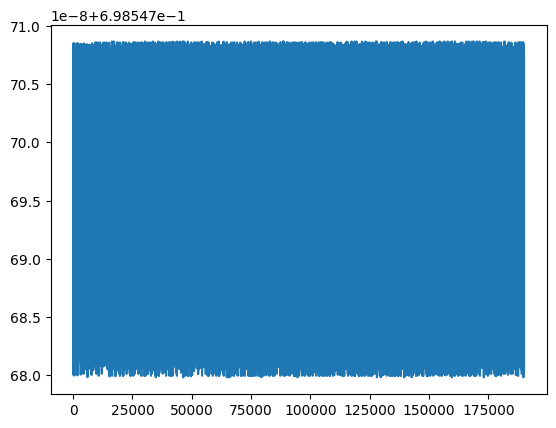

In [ ]:
plt.plot(loss_list[10000:])

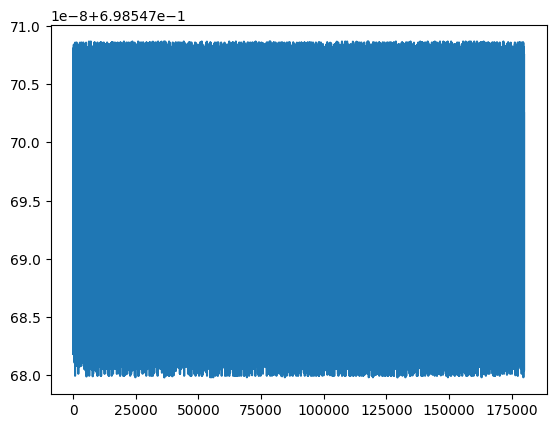

In [ ]:
plt.plot(loss_list[20000:])

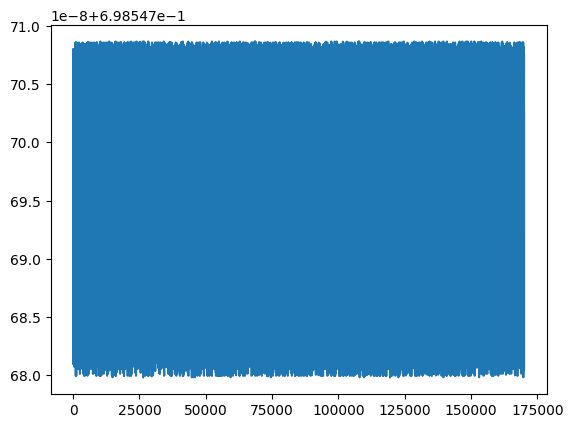

In [ ]:
plt.plot(loss_list[30000:])

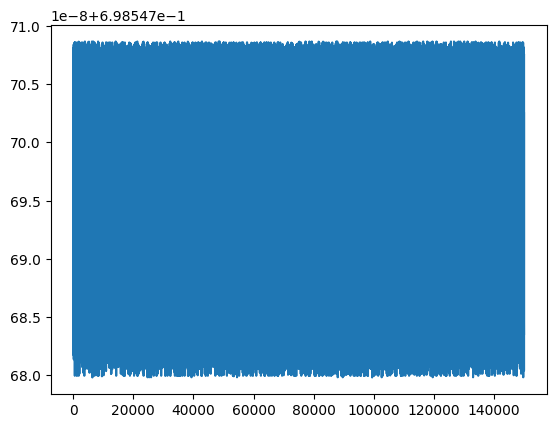

In [ ]:
plt.plot(loss_list[50000:])

In [ ]:
loss_list[0], best_loss

NameError: name 'loss_list' is not defined

In [ ]:
with open(f'{grp_to_use}_results_{num_epochs}_{learning_rate}.pickle', 'wb') as picky:
    pickle.dump({
        'best_params':best_params,
        'best_epoch':best_epoch,
        'best_loss':best_loss,
        'loss_list':loss_list,
    }, picky)

In [ ]:
num_dpoints_in_gal

[17, 7, 7, 7, 30, 11, 41, 5, 7, 31]

C:\Users\Anurag Kadam\AppData\Local\Temp\ipykernel_16856\3056188262.py:14: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(5, 2, n + 1)


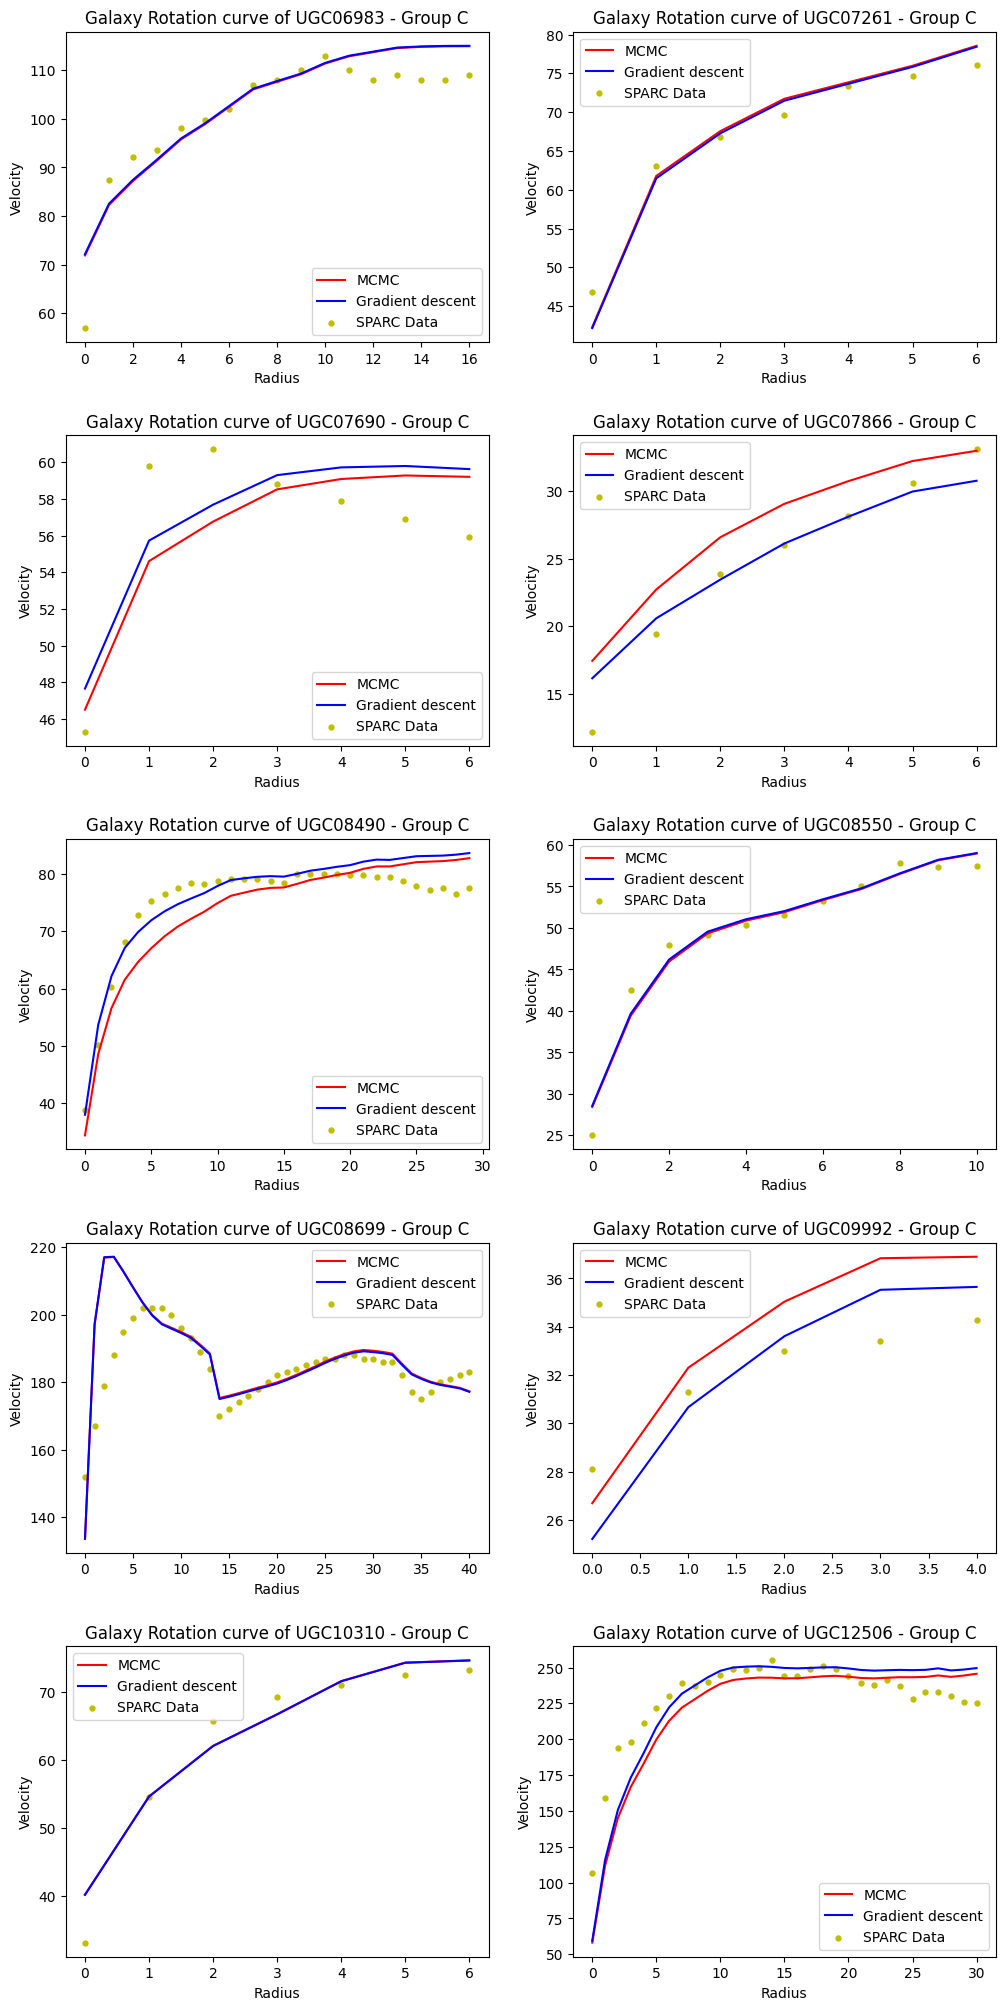

In [25]:
with open("C_results_200000_0.01.pickle", "rb") as f:
    our = pickle.load(f)

their = [
    np.array(grp_selection_dict[grp_to_use + "_m200"]),
    np.array(grp_selection_dict[grp_to_use + "_gam_D"]),
    np.array(grp_selection_dict[grp_to_use + "_gam_B"]),
]

curr_idx = 0
plt.subplots(figsize=(12, 25))

for n, gal in enumerate(gals_grp):
    plt.subplot(5, 2, n + 1)
    plt.plot(
        Vc_model(their)().detach().numpy()[curr_idx : curr_idx + num_dpoints_in_gal[n]],
        "red",
    )
    plt.plot(
        Vc_model(
            list(
                map(
                    lambda x: x.detach().numpy(),
                    our["best_params"],
                )
            )
        )()
        .detach()
        .numpy()[curr_idx : curr_idx + num_dpoints_in_gal[n]],
        "b",
    )
    plt.scatter(
        range(num_dpoints_in_gal[n]),
        torch_SPARC["Vobs"][curr_idx : curr_idx + num_dpoints_in_gal[n]],
        color="y",
        marker=".",
        s=50,
    )

    plt.legend(["MCMC", "Gradient descent", "SPARC Data"])
    plt.xlabel("Radius")
    plt.ylabel("Velocity")
    plt.title(f"Galaxy Rotation curve of {gal} - Group {grp_to_use}")
    # plt.show()
    curr_idx = curr_idx + num_dpoints_in_gal[n]

plt.subplots_adjust(wspace=0.2, hspace=0.3)